In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
graph_table = pd.read_csv("graph1.txt", sep=" ", header=None).values

In [3]:
graph_table

array([[  2,   4],
       [  2,   5],
       [  9,  11],
       ...,
       [227, 754],
       [588, 754],
       [682, 754]], dtype=int64)

In [30]:
graph = nx.Graph()
graph.add_edges_from(graph_table)

In [29]:
graph.nodes()

NodeView(())

In [6]:
num_nodes = graph.number_of_nodes()

In [25]:
degrees = list(graph.degree())
degrees

[(2, 48),
 (4, 7),
 (5, 7),
 (9, 3),
 (11, 3),
 (12, 8),
 (13, 3),
 (14, 3),
 (19, 3),
 (20, 3),
 (24, 5),
 (25, 5),
 (32, 1),
 (31, 4),
 (34, 4),
 (35, 3),
 (36, 16),
 (38, 4),
 (39, 3),
 (40, 3),
 (8, 3),
 (41, 3),
 (47, 7),
 (51, 4),
 (52, 22),
 (44, 7),
 (53, 4),
 (10, 28),
 (54, 33),
 (18, 6),
 (55, 10),
 (56, 8),
 (57, 17),
 (33, 1),
 (60, 15),
 (64, 8),
 (65, 2),
 (67, 4),
 (68, 4),
 (37, 2),
 (69, 2),
 (6, 7),
 (71, 17),
 (15, 12),
 (49, 13),
 (72, 25),
 (70, 2),
 (74, 12),
 (75, 2),
 (43, 8),
 (77, 8),
 (78, 11),
 (79, 16),
 (26, 3),
 (85, 14),
 (73, 3),
 (86, 2),
 (87, 2),
 (17, 12),
 (88, 7),
 (1, 4),
 (90, 1),
 (91, 12),
 (92, 1),
 (93, 17),
 (97, 7),
 (96, 5),
 (27, 2),
 (101, 14),
 (99, 2),
 (103, 7),
 (104, 2),
 (105, 5),
 (106, 5),
 (107, 5),
 (108, 4),
 (109, 18),
 (111, 2),
 (113, 1),
 (114, 3),
 (116, 3),
 (122, 18),
 (115, 1),
 (123, 5),
 (124, 8),
 (119, 7),
 (125, 9),
 (112, 2),
 (126, 1),
 (127, 4),
 (128, 4),
 (132, 1),
 (76, 3),
 (134, 2),
 (94, 14),
 (138, 14)

In [32]:
np.array(graph.degree())[:, 1]

array([48,  7,  7,  3,  3,  8,  3,  3,  3,  3,  5,  5,  1,  4,  4,  3, 16,
        4,  3,  3,  3,  3,  7,  4, 22,  7,  4, 28, 33,  6, 10,  8, 17,  1,
       15,  8,  2,  4,  4,  2,  2,  7, 17, 12, 13, 25,  2, 12,  2,  8,  8,
       11, 16,  3, 14,  3,  2,  2, 12,  7,  4,  1, 12,  1, 17,  7,  5,  2,
       14,  2,  7,  2,  5,  5,  5,  4, 18,  2,  1,  3,  3, 18,  1,  5,  8,
        7,  9,  2,  1,  4,  4,  1,  3,  2, 14, 14,  8,  8,  2,  1,  9, 11,
        3,  5,  8,  2,  2,  1, 11,  3,  3,  4, 12, 10,  4,  2,  1,  3,  3,
        5, 12,  2,  8,  3, 12,  4,  9,  3,  6,  6,  6,  5,  3,  9,  3,  3,
        2,  5, 12,  3,  3,  1, 12,  2,  1, 19,  1,  3, 16,  7, 10,  2, 11,
       12,  3,  3,  4,  7,  7,  8,  4,  7, 12,  3,  8,  7,  7,  5,  4, 12,
        4,  4, 10,  5,  6,  3,  6,  6,  5,  7,  3,  8,  3, 12,  3,  4,  3,
        5,  6,  2,  8,  7,  7,  8, 12,  4,  2,  8,  4,  1,  5,  2,  2,  7,
        3,  2,  1,  6,  7, 14,  3, 14, 12,  4,  1, 10,  6,  2,  2,  2,  3,
        3,  4,  3,  4,  4

In [8]:
np.argmax(degrees, axis=0), np.max(degrees, axis=0)

(array([753, 328], dtype=int64), array([754,  51], dtype=int64))

In [9]:
degrees[328]

(381, 51)

In [10]:
empty_graph = nx.Graph()
if empty_graph.nodes(): # 证明空图会被认为是 Falsy
    print("QWQ")

empty_graph.add_node(1)
if empty_graph.nodes():
    print("QAQ")

QAQ


## 开始删节点

按最大度删节点，同时计算删图的一些指标。

In [11]:
from graph_indicators import graph_features

In [33]:
list_CE = []; list_RCE = []; list_RS = []; list_max_degree = []

In [34]:
while graph.nodes():
    degrees = np.array(graph.degree)
    max_degree = np.max(degrees[:, 1])
    # 计算各种指标
    ce, rce, rs = graph_features(graph)
    list_max_degree.append(max_degree)
    list_CE.append(ce); list_RCE.append(rce); list_RS.append(rs)
    # 寻找最大的度节点
    max_degree_id = np.argmax(degrees[:, 1])
    max_degree_node = degrees[max_degree_id, 0]
    graph.remove_node(max_degree_node)


In [35]:
list_max_degree

[51,
 48,
 43,
 32,
 31,
 28,
 27,
 27,
 26,
 24,
 21,
 20,
 19,
 19,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 

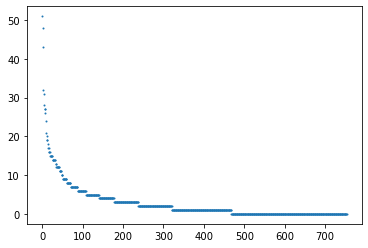

In [47]:
num_del_nodes = list(range(num_nodes))
plt.scatter(num_del_nodes, list_max_degree, label='max_degree', s=1)

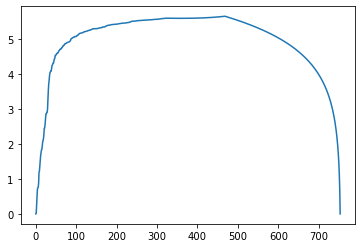

In [39]:
plt.plot(num_del_nodes, list_CE)

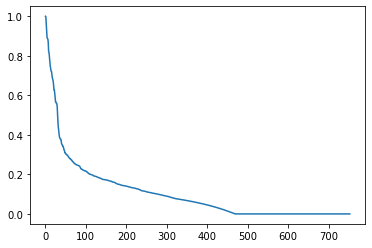

In [40]:
plt.plot(num_del_nodes, list_RCE)

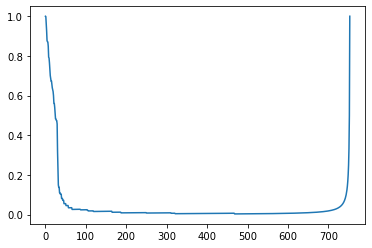

In [45]:
plt.plot(num_del_nodes, list_RS)